# Student's Marks Prediction using Supervised ML

                                                          - Shubham Kshirsagar

### TASK 1

#### To Explore Supervised Machine Learning 

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data .

#### Importing the Required Libraries

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#### Reading the data 

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print ("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no any null values in data hence the data is clean.Data cleaning is not required.

lets find if there is any kind of relationship between our variables Hours of Study and the Percentage Score.

## Model development

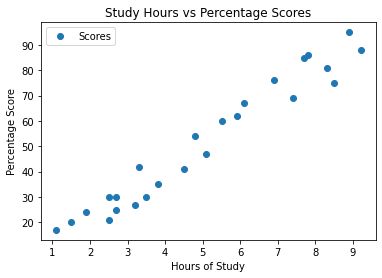

In [4]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours of Study')  
plt.ylabel('Percentage Score')  
plt.show()

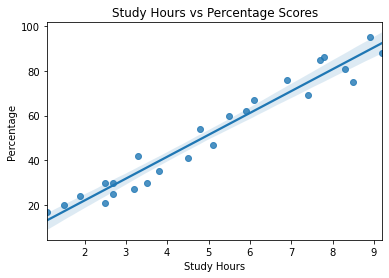

In [5]:
#An excellent way to visualize the fit of our model is by using regression plots.
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

#### we can see from this plot that Percentage is positively correlated with Study Hours since the slope is positive.

#### Lets load the modules for linear regression

In [6]:
from sklearn.linear_model import LinearRegression

#### Create linear regression object

In [7]:
lm = LinearRegression()
lm

LinearRegression()

In [8]:
X = data[['Hours']]
Y = data['Scores']

Fit the linear model using hours.

In [9]:
lm.fit(X,Y)

LinearRegression()

We can output a prediction

In [10]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527])

In [11]:
print ("Intercept is ", lm.intercept_ )
print ("Coefficient is ", lm.coef_ )

Intercept is  2.483673405373196
Coefficient is  [9.77580339]


Lets make the linear model with
Yhat = a + bX
Plugging the actual values we get

#### Scores = 2.48 + 9.77 * Study Hours

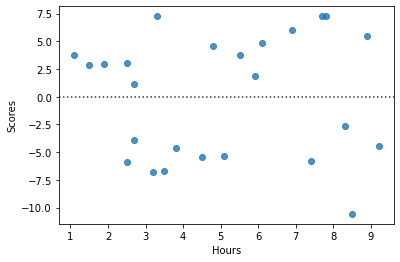

In [12]:
sns.residplot(data['Hours'], data['Scores'])
plt.show()

points in a residual plot are randomly spread out around the x-axis, hence  a linear model is appropriate for the data.

#### Lets determine the accuracy of our model using R squared and mean squared error.

In [13]:
#Hours of Study fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.9529481969048356


We can say that ~ 95.29 % of the variation of the Scores are explained by this simple linear model "Hours of Study".

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [14]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [26.92318188 52.3402707  33.76624426 85.57800223]


Lets import the function mean_squared_error from the module metrics

In [15]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results

In [16]:
mse = mean_squared_error(data['Scores'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  28.88273050924546


Hence the difference between actual value and the estimated value is 28.88

# Training and Testing 

An important step in testing our model is to split data into training and testing data. We will place the target data 'Scores' in a separate dataframe y:

In [17]:
y_data = data['Scores']

drop price data in x data

In [18]:
x_data=data.drop('Scores',axis=1)

Now we randomly split our data into training and testing data using the function train_test_split.

In [19]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=0)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 5
number of training samples: 20


Let's import LinearRegression from the module linear_model.

In [20]:
from sklearn.linear_model import LinearRegression

We create a Linear Regression object:

In [21]:
lre=LinearRegression()

we fit the model using the feature Hours of Study

In [22]:
lre.fit(x_train[['Hours']], y_train)

LinearRegression()

Let's Calculate the R^2 on the test data and train data

In [23]:
lre.score(x_test[['Hours']], y_test)

0.9454906892105356

In [24]:
lre.score(x_train[['Hours']], y_train)

0.9515510725211552

In [25]:
Yhat_test=lm.predict(x_test)
Yhat_train=lm.predict(x_train)

In [26]:
Yhat_test

array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

In [27]:
Yhat_train

array([39.63172629, 21.05769985, 78.73493985, 69.9367168 , 13.23705714,
       52.3402707 , 77.75735951, 34.74382459, 83.62284155, 92.4210646 ,
       62.11607409, 36.69898527, 28.87834256, 56.25059205, 28.87834256,
       85.57800223, 26.92318188, 49.40752968, 89.48832358, 46.47478866])

## Model Evaluation

#### Lets predict Scores using our model

In [28]:
data= pd.DataFrame({'Actual': y_test,'Predicted': Yhat_test})
data

,Actual,Predicted
5,20,17.147378
2,27,33.766244
19,69,74.824618
16,30,26.923182
11,62,60.160913


In [29]:
#Let's predict the score for 9.25 hours of study
print('Score of student who will study for 9.25 hours would be  ', lre.predict([[9.25]]))

Score of student who will study for 9.25 hours would be   [93.69173249]
